In [ ]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '/content/drive/MyDrive/diamonds.csv'
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [3]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

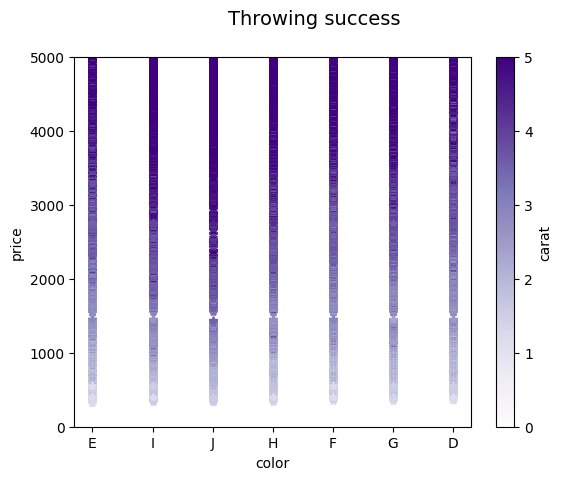

In [ ]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [ ]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

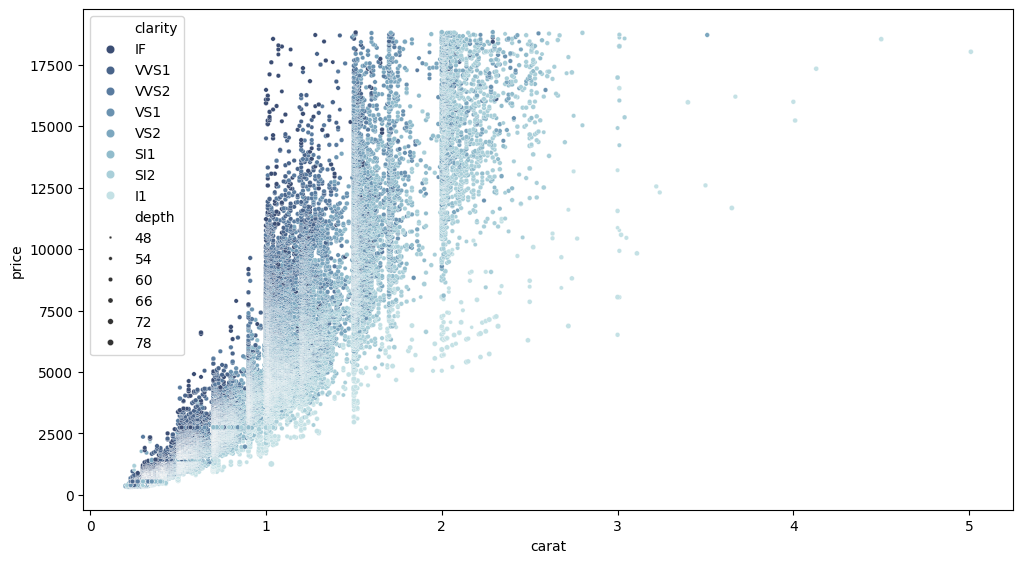

In [ ]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

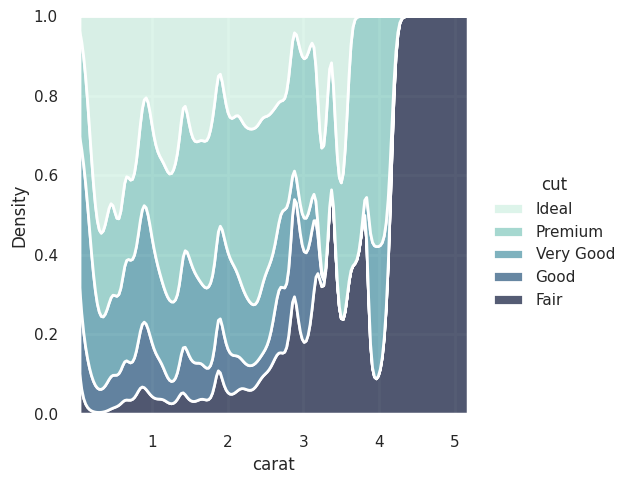

In [ ]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

1) 1번 시각화의 목적, 효과 및 개선점

다이아몬드의 컬러(D~Z)에 대해 캐럿 크기에 따른 가격의 변화를 보여주는 것에 목적이 있다. 전반적으로 모든 컬러에 대해 캐럿의 크기가 클 수록 가격이 비싸지는 것을 확인할 수 있다.그러나 다이아몬드 색상으로 그룹핑을 해 시각화하였는데, 색상에 따른 차이가 눈에 보이지 않는다. 그리고 Throwing Success라는 타이틀이 무슨 의미인지 잘 모르겠어서 그 부분을 수정하면 좋을 것 같다.

2) 2번 시각화의 목적, 효과 및 개선점

다이아몬드의 캐럿의 크기와 투명도, 그리고 깊이가 가격에 어떻게 영향을 미치는지를 보여주는 시각화이다. 깊이가 시각화에서는 원의 크기로 표현이 되었는데 잘 드러나지 않는 점이 아쉽다. 점의 크기를 depth * 2 의 방식으로 더 키우는 것이 좋아보인다.

3) 3번 시각화의 목적, 효과 및 개선점
다이아몬드 캐럿을 cut 방식에 따라 밀도로 보여줌으로써 어떤 크기에서 어떤 cut 방식이 지배적으로 사용되는지를 확인할 수 있다. 그런데 해당 시각화 그래프에서는 둘의 상관관계를 파악하기가 어려웠다. (kda 사용한 시각화를 처음 봐서일 수도 있다) 그냥 grouping해서 histogram으로 보여줘도 괜찮지 않을까라는 생각을 해보았다.

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 여기에 답을 작성해주세요.

In [4]:
df['color'] = df['color'].replace({letter: index for index, letter in enumerate('DEFGHIJKLMNOPQRSTUVWXYZ', start=1)})
df['color'] = df['color'].astype(int)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  int64   
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(2), float64(6), int64(2)
memory usage: 3.4 MB


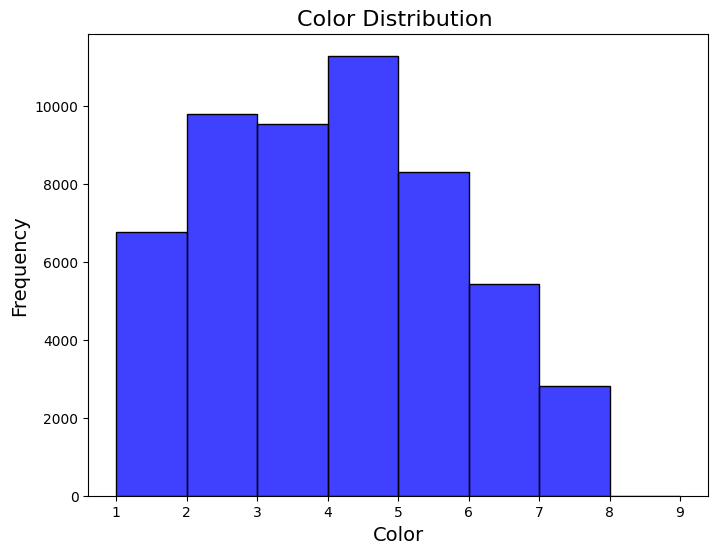

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df['color'], bins=range(1, 10), kde=False, color='blue', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('Color Distribution ', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# 그래프 보여주기
plt.show()

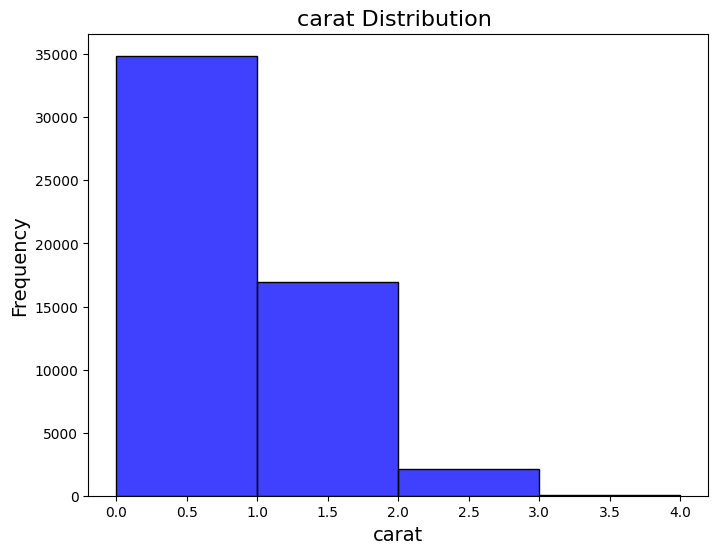

In [7]:
# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df['carat'], bins=range(0, 5), kde=False, color='blue', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('carat Distribution ', fontsize=16)
plt.xlabel('carat', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# 그래프 보여주기
plt.show()

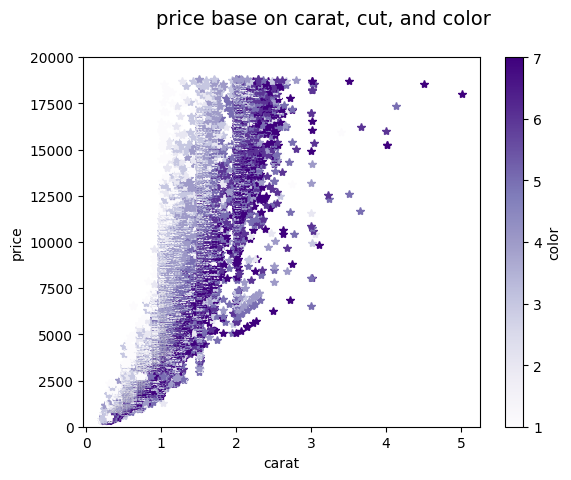

In [8]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.get_cmap("Purples")  # Use plt.get_cmap to get the colormap
norm = Normalize(vmin=df['color'].min(), vmax=df['color'].max())  # Normalize color values

fig, ax = plt.subplots()
fig.suptitle("price base on carat, cut, and color", size=14)

for carat, cut, color, clarity, price in zipped_data:
    ax.plot(carat,
            price,
            marker='*',
            color=cmap(norm(color)))  # Use norm(color) to normalize color values

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, label="color")
ax.set_xlabel("carat")
ax.set_ylabel("price")
ax.set_ylim(0, 20000)

plt.show()

# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


1. 어떤 신발 사이즈를 샀을 때 가장 리셀하기 좋은지에 대한 질문에 답하고자 했다.
2. 따라서 신발 사이즈에 따른 차익(Price Difference)와 신발 사이즈에 따른 신발 개수를 고려하였다.
3. 대체로 비슷하게 차액이 형성되나, 극단적으로 큰 신발 사이즈는 매우 높은 차액 이득을 얻을 수 있다. 그러나 판매수는 매우 작다. 7.5 - 9.0 사이즈가 제일 쉽게 사고 팔 수 있을 듯 하다.
4. 기업의 경우 큰 사이즈의 신발을 조금 더 생산해도 좋을 듯 하다. (리셀가격 차가 너무 큼)

In [17]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.
csv_path = '/content/drive/MyDrive/StockX-Data-Contest-2019-3.csv'
df = pd.read_csv(csv_path)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [19]:
df = df.drop(['Order Date', 'Release Date', 'Buyer Region'], axis="columns")
df.head(3)

,Brand,Sneaker Name,Sale Price,Retail Price,Shoe Size
0,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,11.0
1,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11.0
2,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11.0


In [20]:
df['Sale Price'] = df['Sale Price'].str.replace('$', '')
df['Sale Price'] = df['Sale Price'].str.replace(',', '')
df['Retail Price'] = df['Retail Price'].str.replace('$', '')
df['Retail Price'] = df['Retail Price'].str.replace(',', '')
df['Sale Price'] = df['Sale Price'].astype(int)
df['Retail Price'] = df['Retail Price'].astype(int)

<ipython-input-20-f02b9462c98f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sale Price'] = df['Sale Price'].str.replace('$', '')
<ipython-input-20-f02b9462c98f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Retail Price'] = df['Retail Price'].str.replace('$', '')


In [21]:
df['Price Difference'] = df['Sale Price'] - df['Retail Price']
df = df.drop(['Retail Price', 'Sale Price'], axis=1)

In [22]:
df.head(3)

,Brand,Sneaker Name,Shoe Size,Price Difference
0,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,877
1,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,11.0,465
2,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,11.0,470


In [23]:
df['Brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

In [24]:
df = df[df['Brand']==' Yeezy']
df

,Brand,Sneaker Name,Shoe Size,Price Difference
0,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,877
1,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,11.0,465
2,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,11.0,470
3,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,855
4,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,11.0,608
...,...,...,...,...
99951,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,8.0,345
99952,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,8.5,378
99953,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,5.5,385
99954,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,11.0,430


<ipython-input-51-c23d1c145d6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shoe Size', y='Price Difference', data=df, palette='viridis', ax=plt.gca())
<ipython-input-51-c23d1c145d6c>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Shoe Size', data=df, fill=True, palette='Set2', ax=ax2)


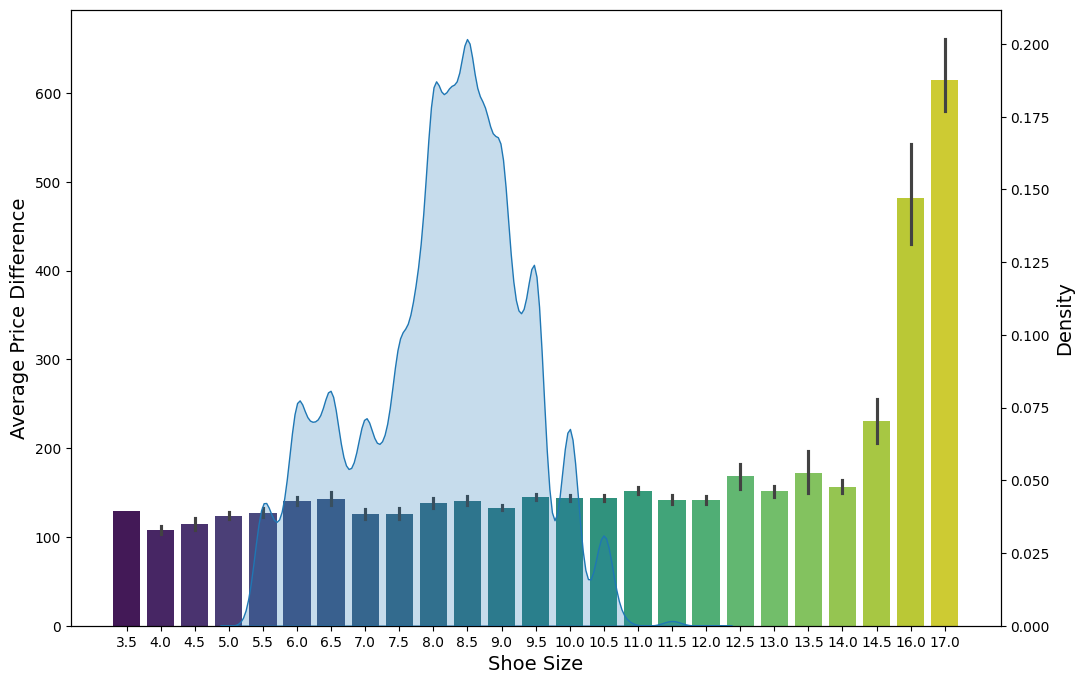

In [51]:
plt.figure(figsize=(12, 8))

# 밀도 함수로 신발 사이즈 분포
sns.barplot(x='Shoe Size', y='Price Difference', data=df, palette='viridis', ax=plt.gca())
plt.ylabel('Average Price Difference', fontsize=14)
plt.xlabel('Shoe Size', fontsize=14)

# Bar plot으로 신발 사이즈에 따른 평균 가격 차이
ax2 = plt.gca().twinx()
sns.kdeplot(x='Shoe Size', data=df, fill=True, palette='Set2', ax=ax2)
ax2.set_ylabel('Density', fontsize=14)

plt.show()